<a href="https://colab.research.google.com/github/NFalah25/AI/blob/main/24_Naufal%20Falah%20Wafiuddin_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Naufal Falah Wafiuddin

Kelas : TI-2C

NIM : 2141720129

Absen : 24

1. Pada percobaan yang menerapkan decision tree dengan bahasa python ini, mula-mula
kita mengimport library yang digunakan:
# Bagian Baru

In [20]:
import numpy as np
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log

2. Setelah itu kita Mendefinisikan dataset yang akan digunakan:

In [21]:
outlook = 'overcast,overcast,overcast,overcast,rainy,rainy,rainy,rainy,rainy,sunny,sunny,sunny,sunny,sunny'.split(',')
temp = 'hot,cool,mild,hot,mild,cool,cool,mild,mild,hot,hot,mild,cool,mild'.split(',')
humidity = 'high,normal,high,normal,high,normal,normal,normal,high,high,high,high,normal,normal'.split(',')
windy = 'FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE'.split(',')
play = 'yes,yes,yes,yes,yes,yes,no,yes,no,no,no,no,yes,yes'.split(',')

3. Membuat dataframe

In [22]:
dataset={'outlook':outlook,'temp':temp,'humidity':humidity,'windy':windy,'play':play}
df = pd.DataFrame(dataset,columns=['outlook','temp','humidity','windy','play'])

4. Setelah itu mencari entropi suatu kejadian

In [23]:
##1. calculate entroy o the whole dataset

entropy_node = 0 #Initialize Entropy
values = df.play.unique() #Unique objects - 'yes', 'no'
for value in values:
  fraction = df.play.value_counts()[value]/len(df.play)
  entropy_node += -fraction*np.log2(fraction)
entropy_node

0.9402859586706309

5. Setelah itu mencari entropi untuk setiap atribut
Menggunakan Rumus:

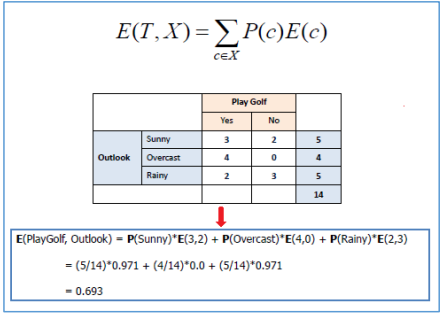

In [24]:
def ent(df,attribute):
  target_variables = df.play.unique() #This gives all 'Yes' and 'No'
  variables = df[attribute].unique() #This gives different features in that attribute (Like 'Sweet')


  entropy_attribute = 0
  for variable in variables:
    entropy_each_feature = 0
    for target_variable in target_variables:
      num = len(df[attribute][df[attribute]==variable][df.play ==target_variable]) #numerator
      den = len(df[attribute][df[attribute]==variable]) #denominator
      fraction = num/(den+eps) #pi
      entropy_each_feature += -fraction*log(fraction+eps) #this calculates entropy for one feature Like 'Sweet'
    fraction2 = den/len(df)
    entropy_attribute += -fraction2*entropy_each_feature

  return(abs(entropy_attribute))

Menyimpan entropi untuk setiap atribut


In [25]:
a_entropy = {k:ent(df,k) for k in df.keys()[:-1]}
a_entropy

{'outlook': 0.6935361388961914,
 'temp': 0.9110633930116756,
 'humidity': 0.7884504573082889,
 'windy': 0.892158928262361}

6. Menghitung information gain untuk setiap atribut
Menggunakan rumus :

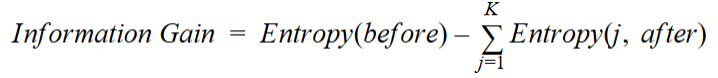


In [18]:
def ig(e_dataset,e_attr):
  return(e_dataset-e_attr)

Menyimpan information gain untuk setiap atribut di dict

In [19]:
#entropy_node = entropy of dataset
#a_entropy[k] = entropy ofk(th) attr
IG = {k:ig(entropy_node,a_entropy[k]) for k in a_entropy}
IG

{'outlook': 0.24674981977443955,
 'temp': 0.029222565658955313,
 'humidity': 0.15183550136234203,
 'windy': 0.21587814080803924}

7. adalah code yang sudah complete


In [26]:
import numpy as np
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log

outlook = 'overcast,overcast,overcast,overcast,rainy,rainy,rainy,rainy,rainy,sunny,sunny,sunny,sunny,sunny'.split(',')
temp = 'hot,cool,mild,hot,mild,cool,cool,mild,mild,hot,hot,mild,cool,mild'.split(',')
humidity = 'high,normal,high,normal,high,normal,normal,normal,high,high,high,high,normal,normal'.split(',')
windy = 'FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE'.split(',')
play = 'yes,yes,yes,yes,yes,yes,no,yes,no,no,no,no,yes,yes'.split(',')

dataset = {'outlook':outlook,'temp':temp,'humidity':humidity,'windy':windy,'play':play}
df = pd.DataFrame(dataset,columns=['outlook','temp','humidity','windy','play'])

def find_entropy(df):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy

def find_entropy_attribute(df,attribute):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    target_variables = df[Class].unique()  #This gives all 'Yes' and 'No'
    variables = df[attribute].unique()    #This gives different features in that attribute (like 'Hot','Cold' in Temperature)
    entropy2 = 0
    for variable in variables:
        entropy = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
            den = len(df[attribute][df[attribute]==variable])
            fraction = num/(den+eps)
            entropy += -fraction*log(fraction+eps)
        fraction2 = den/len(df)
        entropy2 += -fraction2*entropy
    return abs(entropy2)

def find_winner(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(IG)]

def get_subtable(df,node,value):
    return df[df[node] == value].reset_index(drop=True)

def buildTree(df,tree=None):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    #Get attribute with maximum information gain
    node = find_winner(df)
    #Get distinct value of that attribute e.g Salary is node and Low,Med and High are values
    attValue = np.unique(df[node])
    #Create an empty dictionary to create tree
    if tree is None:
        tree={}
        tree[node] = {}
    #We make loop to construct a tree by calling this function recursively.
    #In this we check if the subset is pure and stops if it is pure.
    for value in attValue:
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable['play'],return_counts=True)
        if len(counts)==1: #Checking purity of subset
            tree[node][value] = clValue[0]
        else:
            tree[node][value] = buildTree(subtable) #Calling the function recursively
    return tree

t = buildTree(df)
import pprint
pprint.pprint(t)

{'outlook': {'overcast': 'yes',
             'rainy': {'windy': {'FALSE': 'yes', 'TRUE': 'no'}},
             'sunny': {'humidity': {'high': 'no', 'normal': 'yes'}}}}


##Soal 
###1. Apakah Decision Tree di atas sudah sesuai dengan yang ada di PPT?